In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
from src.data.some_dataloader import RedditDataset
from src.utils.data_utils import get_df_time_window
from src.utils.plot_utils import plot_subreddit_graph
from src.utils.data_utils import compute_core_subgraph

In [2]:
dataset = RedditDataset()
data = dataset.data

Top 10 subreddits by graph core density:
['askreddit', 'todayilearned', 'creepy', 'writingprompts', 'iama', 'pics', 'documentaries', 'newsokur', 'movies', 'leagueoflegends']
Nodes: 10, Edges: 60


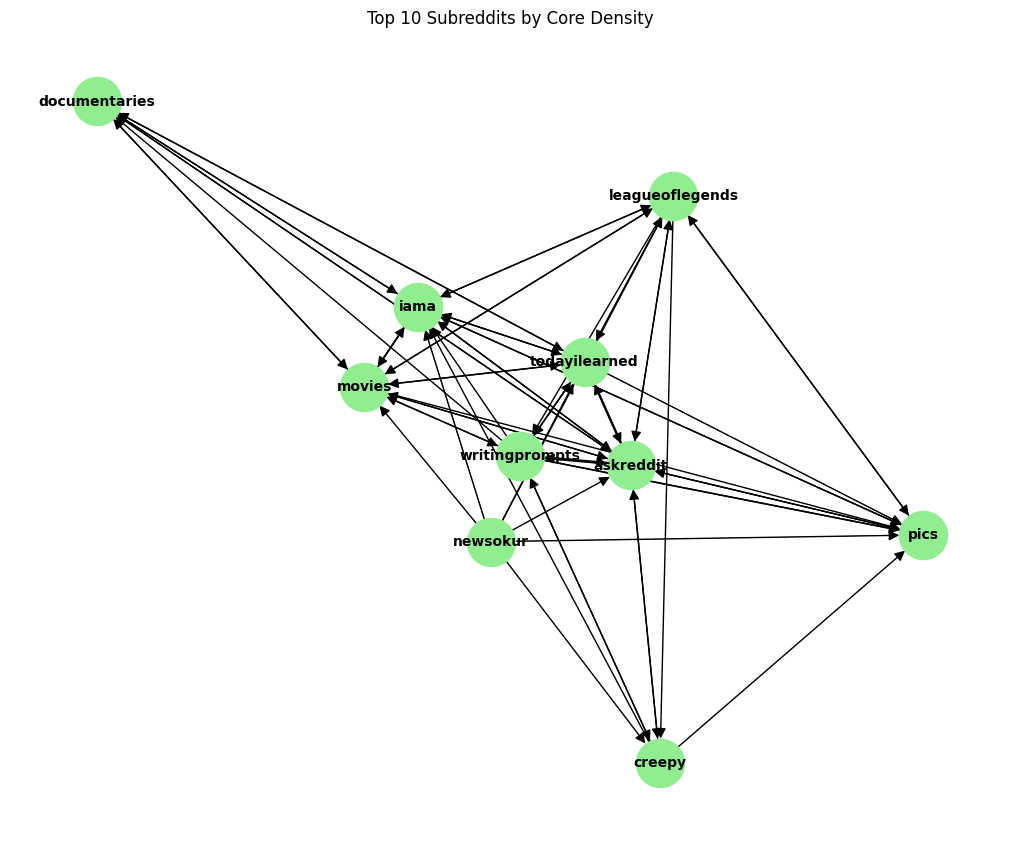

DiGraph with 10 nodes and 60 edges


In [ ]:
n_core = 10
G_core = compute_core_subgraph(data, k=n_core)
plot_subreddit_graph(G_core, title=f"Top {n_core} Subreddits by Core Density")

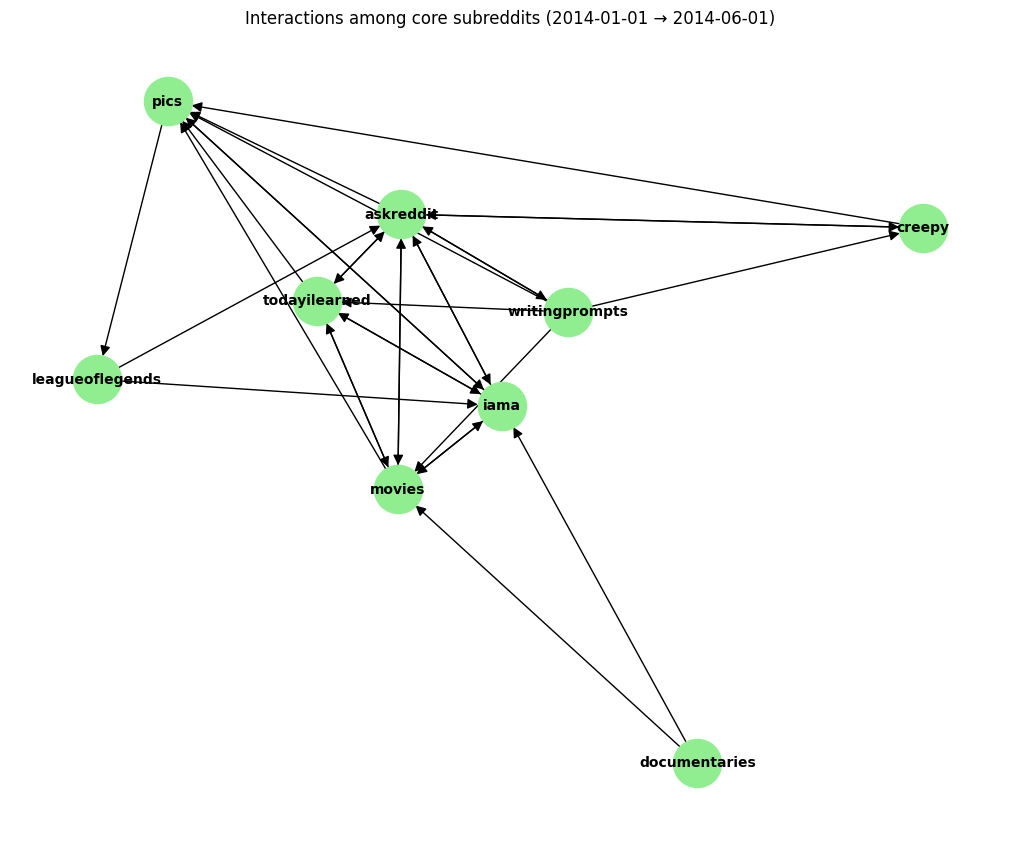

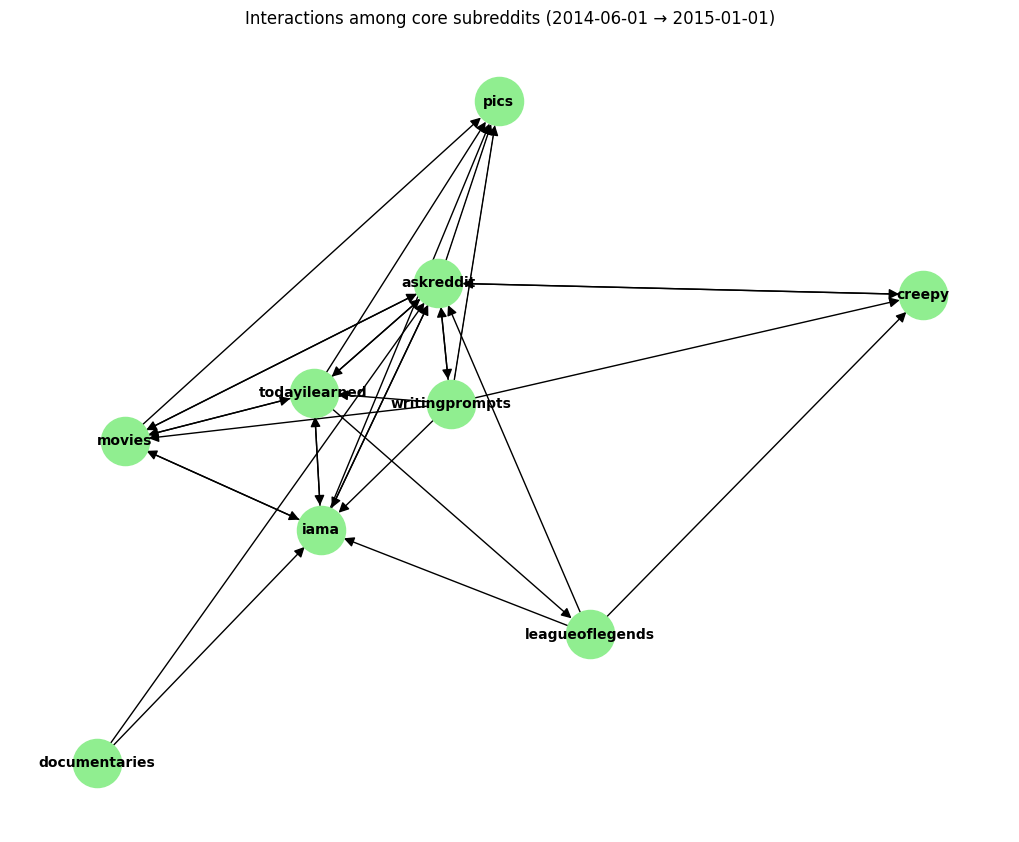

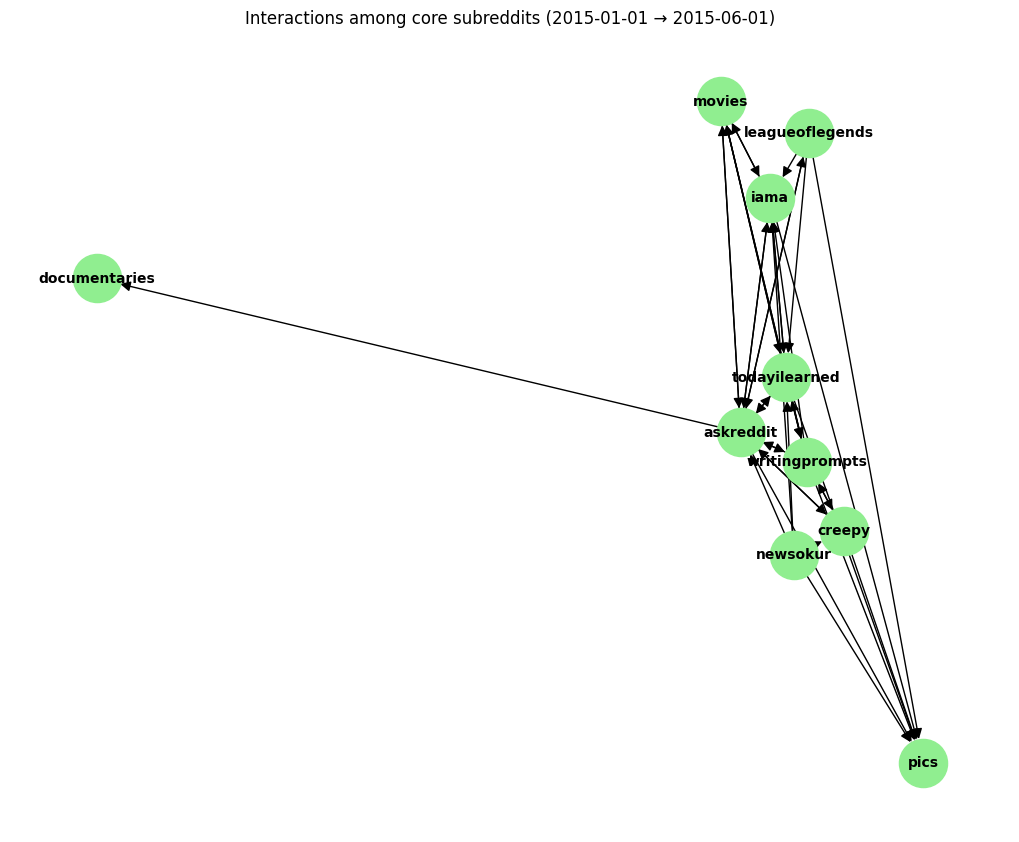

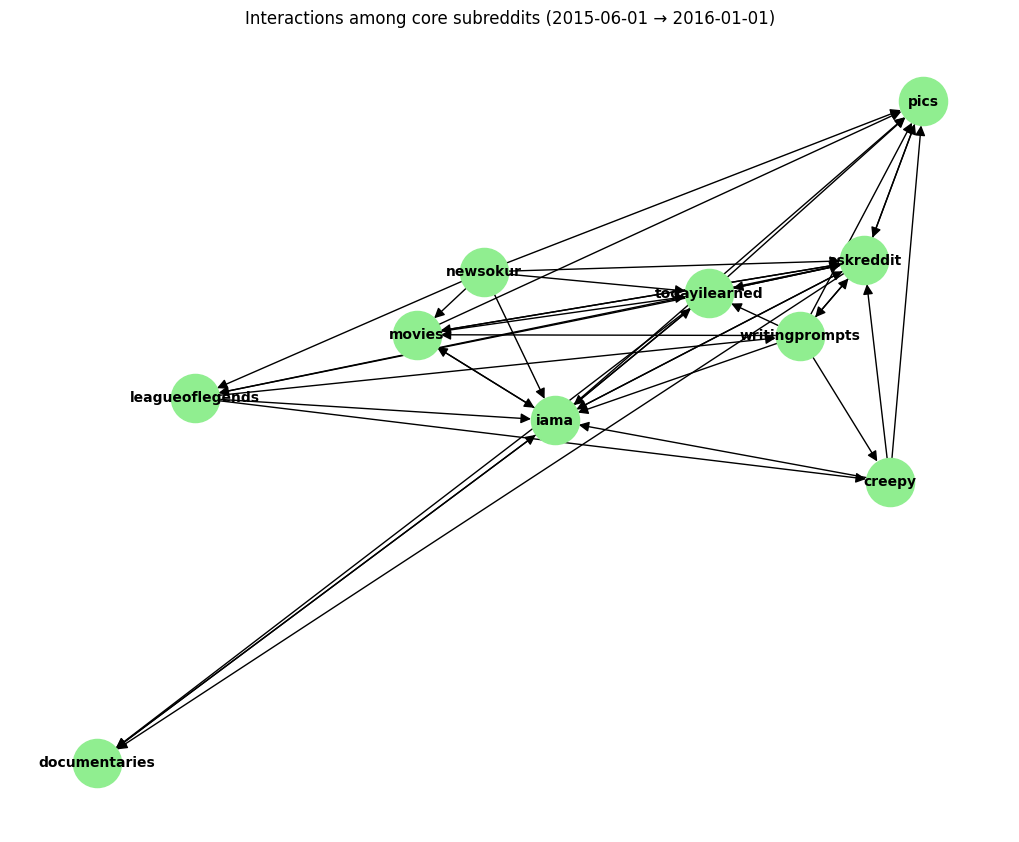

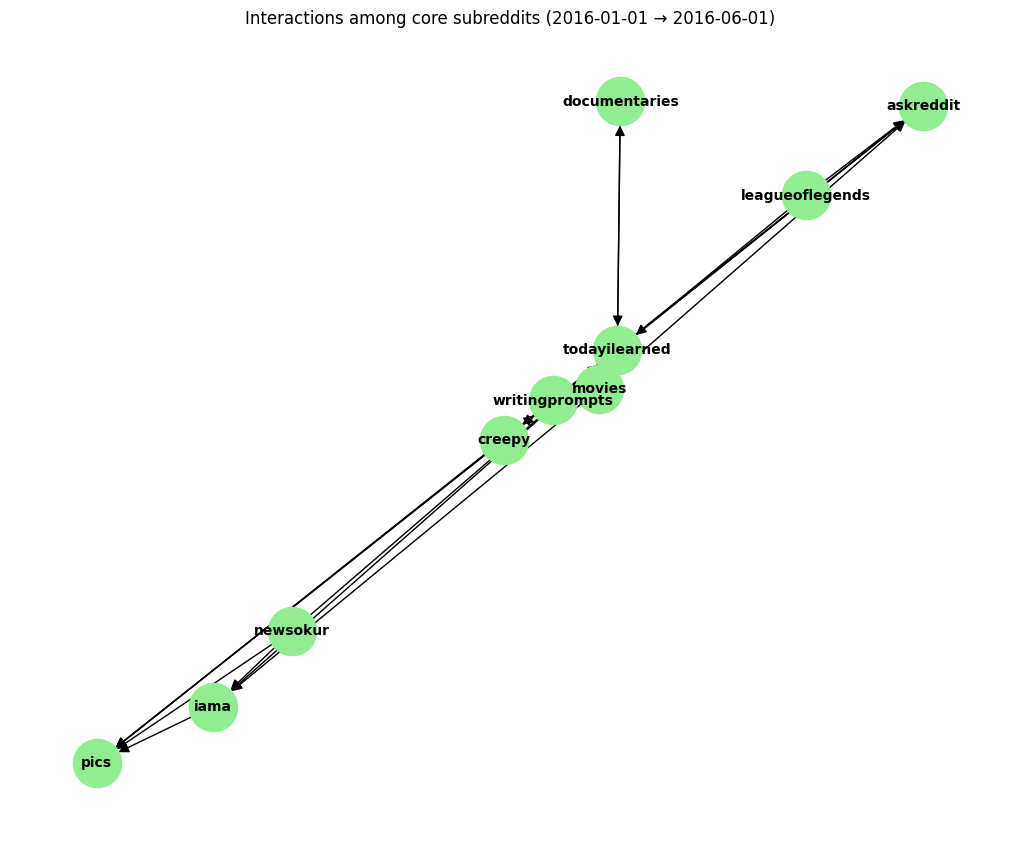

In [ ]:
# === Plot interactions between core subreddits across multiple time windows ===

# Get the subreddits in the global core
core_subreddits = list(G_core.nodes())

# Define time windows
time_windows = [
    ("2014-01-01", "2014-06-01"),
    ("2014-06-01", "2015-01-01"),
    ("2015-01-01", "2015-06-01"),
    ("2015-06-01", "2016-01-01"),
    ("2016-01-01", "2016-06-01"),
]

for start, end in time_windows:
    # Filter data to core subreddits only
    df_core = data[
        data["SOURCE_SUBREDDIT"].isin(core_subreddits) &
        data["TARGET_SUBREDDIT"].isin(core_subreddits)
    ]

    # Then crop to time window
    df_window = get_df_time_window(df_core, start, end)

    # Build edges for this time window
    edges = (
        df_window.groupby(["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT"])
        .size()
        .reset_index(name="weight")
    )

    # Build directed weighted graph
    G_window = nx.from_pandas_edgelist(
        edges,
        "SOURCE_SUBREDDIT",
        "TARGET_SUBREDDIT",
        edge_attr="weight",
        create_using=nx.DiGraph()
    )

    # Plot
    plot_subreddit_graph(G_window, title=f"Interactions among core subreddits ({start} → {end})", edge_scale=300)
